In [ ]:
# !pip install diffusers transformers accelerate scipy safetensors translate gradio

In [ ]:
# !pip install ninja
# !pip install -v -U git+https://github.com/facebookresearch/xformers.git@main#egg=xformers

In [183]:
from diffusers import StableDiffusionImg2ImgPipeline, EulerDiscreteScheduler, DiffusionPipeline, DPMSolverMultistepScheduler
import torch

model_id = "stabilityai/stable-diffusion-2"
# model_id = "stabilityai/stable-diffusion-2-inpainting"

# # Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16")
# pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
# pipe = pipe.to("cuda")

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

In [186]:
from PIL import Image

prompt = "RobotCat is eating(sleeping) apple. Realistic style."
image = pipe(prompt=prompt).images[0]
    
image.save("result.png")
image

TypeError: 'NoneType' object is not subscriptable

  0%|          | 0/200 [00:00<?, ?it/s]

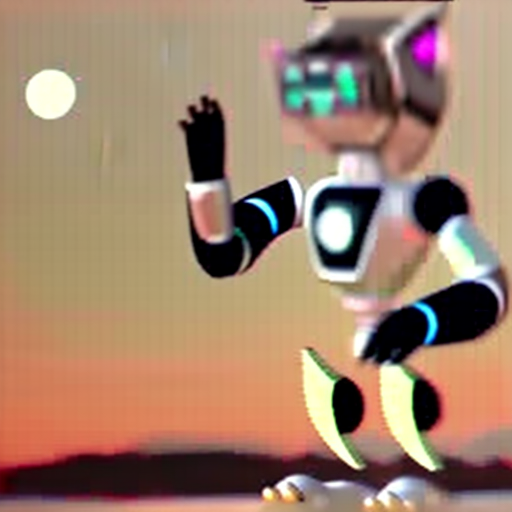

In [182]:
from PIL import Image

init_image = Image.open('cat2.png').convert('RGB').resize((512, 512))
mask_image = Image.open('mask3.png').convert('RGB').resize((512, 512))

prompt = "The robot-cat is flying above the Earth, looking like a future universe and seeing the moon and stars in the distance. Animation Sytle."
image = pipe(prompt=prompt, image=init_image, mask_image=mask_image, guidance_scale=25, num_inference_steps=200).images[0]
image

  0%|          | 0/300 [00:00<?, ?it/s]

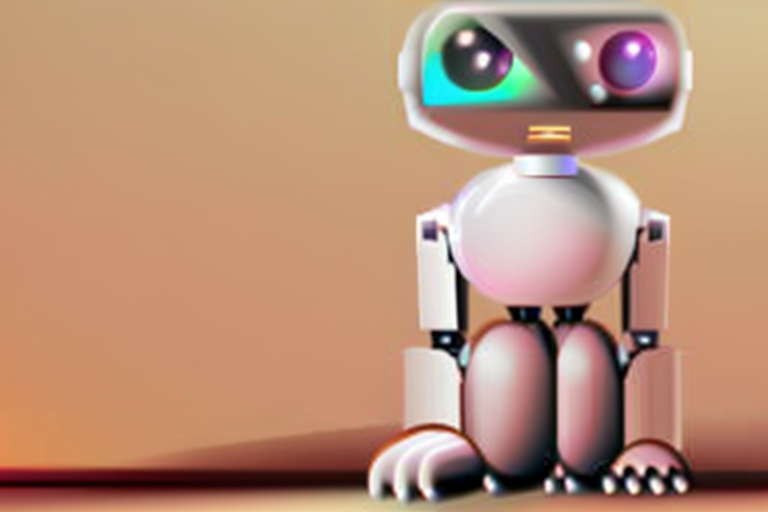

In [160]:
from PIL import Image

init_image = Image.open('cat2.png').convert('RGB').resize((768, 512))

prompt = "RobotCat is eating(sleeping) apple. Realistic style."
image = pipe(prompt=prompt, image=init_image, strength=0.6, guidance_scale=25, num_inference_steps=500).images[0]
    
image.save("result.png")
image

  0%|          | 0/600 [00:00<?, ?it/s]

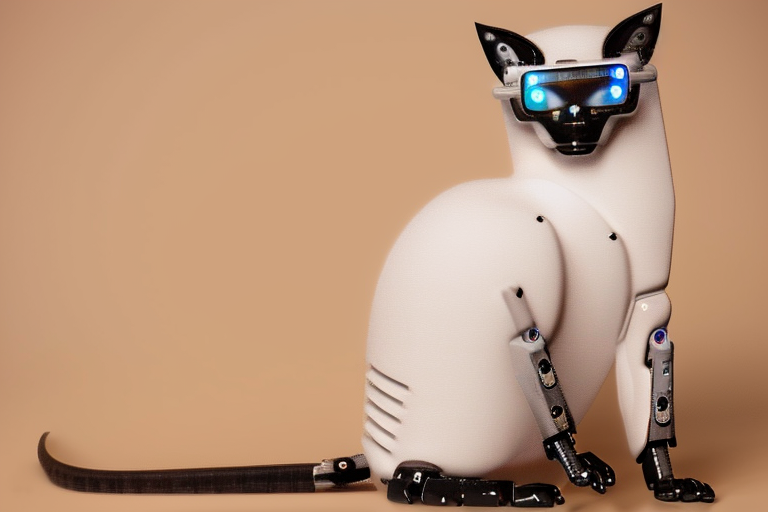

In [77]:
from PIL import Image

init_image = Image.open('cat.jpg').convert('RGB').resize((768, 512))

prompt = "Robot Cat in universe. Cyberpunk Style"
image = pipe(prompt=prompt, image=init_image, strength=0.6, guidance_scale=7.5, num_inference_steps=1000).images[0]
    
image.save("result.png")
image

  0%|          | 0/40 [00:00<?, ?it/s]

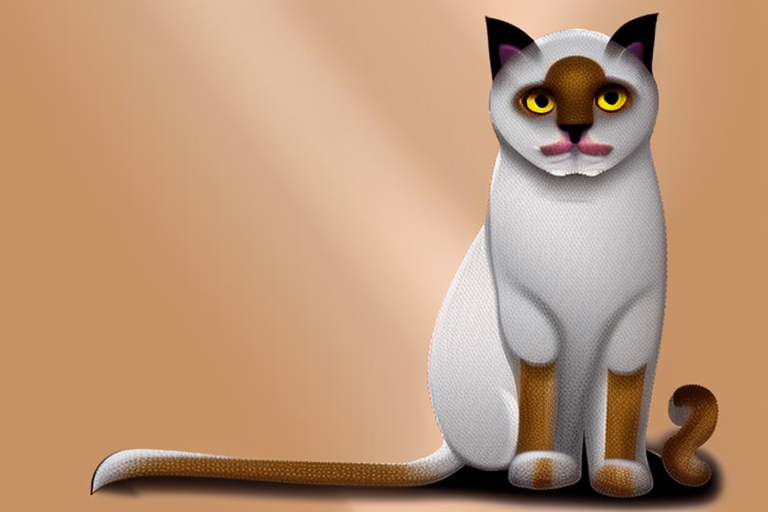

In [28]:
from PIL import Image

init_image = Image.open('cat.jpg').convert('RGB').resize((768, 512))

prompt = "Cartoon style emoticon of picture's cat. There is no background."
image = pipe(prompt=prompt, image=init_image).images[0]
    
image.save("result.png")
image

In [23]:
from PIL import Image

init_image = Image.open('cat.jpg').convert('RGB')

prompt = "Cartoon style emoticon of picture's cat. There is no background."
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]
    
image.save("result.png")
image

  0%|          | 0/37 [00:00<?, ?it/s]

KeyboardInterrupt: 